In [2]:
%matplotlib inline

import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import calendar
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# OLS Minimos Cuadrados Orinarios

http://blog.findemor.es/2018/01/modelos-predictivos-en-python/ 

In [4]:
#Se cargan los archivos 

total=pd.read_excel("GLM.xlsx",index_col=0) 
total

,APRENDIZ,PROD_NAL,OBRERO,TOTPERSONAL,COSTOS_PT_ELAB_TERCEROS,OUTSOURCING_ADM,MUESTRASGRATIS_PROD,PUBLICIDAD_PROD,GASTOSCARTERA,GASTOSMAQ_USOPROPIO,SEGUROS,TOTALINV_EINFORMATICA,TOTALINVER,INV_PT,MPCOMPRADA,VENTAS,Ln
1,5.370346,2.000000,10.0,13.0,1.789890e+05,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,43511.436095,27708.860206,493915.398347,8.695000e+04,2602400.0,3460300.0,15.06
2,5.370346,12.562613,3.0,9.0,1.158180e+06,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,4535.000000,27708.860206,53869.000000,1.245539e+06,102941.0,296411.0,12.60
3,5.370346,1.000000,30.0,36.0,2.726740e+05,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,993.000000,27708.860206,3200.000000,7.972300e+04,867491.0,1597520.0,14.28
4,5.370346,2.000000,3.0,5.0,1.158180e+06,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,43511.436095,27708.860206,493915.398347,7.102000e+04,26720.0,231480.0,12.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,3.000000,12.562613,27.0,46.0,1.158180e+06,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,10847.000000,11182.000000,11182.000000,1.435000e+04,618268.0,1100444.0,13.91
10293,2.000000,12.562613,29.0,46.0,1.158180e+06,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,4900.000000,27708.860206,493915.398347,5.510530e+05,2164604.0,3300208.0,15.01
10294,12.000000,9.000000,260.0,303.0,6.470340e+05,165701.494784,15326.602761,22549.880305,2.444700e+04,246692.380952,34127.000000,21831.000000,503083.000000,9.949920e+05,6940062.0,15443532.0,16.55
10295,2.000000,12.562613,11.0,21.0,1.158180e+06,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,3149.000000,27708.860206,493915.398347,1.245539e+06,421689.0,1180126.0,13.98


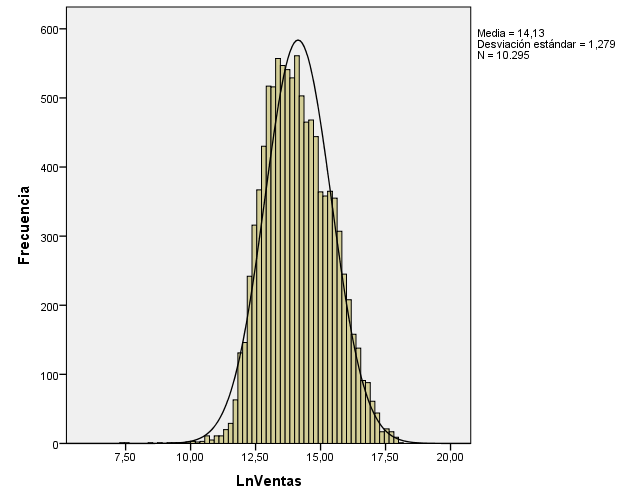

### Análisis de clúster

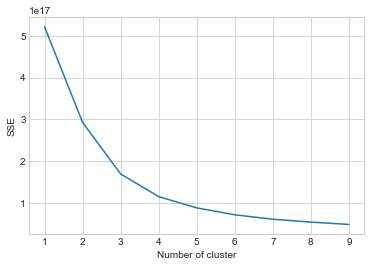

In [5]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(total)
    total["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [6]:
kmeans_2 = KMeans(n_clusters=3, random_state=0).fit(total)

In [8]:
centros = kmeans_2.cluster_centers_[kmeans_2.labels_]
distancia = np.sqrt(np.sum((total-centros)**2, axis=1))
data_clean = np.argwhere(distancia < np.mean(distancia) + 3*np.std(distancia)).flatten()
total_2 = total.iloc[data_clean]
total_2.to_csv("Limpios.csv", decimal=",")

In [9]:
X = total_2.drop(["Ln",'clusters'],axis=1).as_matrix()
variables = total_2.drop("Ln",axis=1).columns
y = total["Ln"]
scale = StandardScaler()

In [10]:
formula = "Ln ~ APRENDIZ + PROD_NAL + OBRERO + TOTPERSONAL + COSTOS_PT_ELAB_TERCEROS + OUTSOURCING_ADM + MUESTRASGRATIS_PROD + PUBLICIDAD_PROD + GASTOSCARTERA + GASTOSMAQ_USOPROPIO + SEGUROS + TOTALINV_EINFORMATICA + TOTALINVER + INV_PT + MPCOMPRADA"

In [11]:
est = ols(formula, total_2).fit()
 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ln   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1103.
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:28:29   Log-Likelihood:                -11671.
No. Observations:               10151   AIC:                         2.337e+04
Df Residuals:                   10135   BIC:                         2.349e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  15.9419      1.418     11.245      0.000      13.163      18.721
APRENDIZ                   -0.0930      0.004    -23.743      0.000      -0.101      -0.085
PROD_NAL                   -0.0120      0.001     -9.128      0.000      -0.015      -0.009
OBRERO                     -0.0051      0.000    -12.044      0.000      -0.006      -0.004
TOTPERSONAL                 0.0131      0.000     35.532      0.000       0.012       0.014
COSTOS_PT_ELAB_TERCEROS  1.385e-08    1.1e-08      1.254      0.210    -7.8e-09    3.55e-08
OUTSOURCING_ADM         -2.713e-07   1.66e-07     -1.633      0.103   -5.97e-07    5.44e-08
MUESTRASGRATIS_PROD      2.072e-06   3.08e-06      0.672      0.501   -3.97e-06    8.11e-06
PUBLICIDAD_PROD          5.184e-06   1.06e-06      4.911      0.000    3.11e-06    7.25e-06
GASTOSCARTERA           -3.226e-08   2.26e-09    -14.295      0.000   -3.67e-08   -2.78e-08
GASTOSMAQ_USOPROPIO     -6.358e-06   5.74e-06     -1.107      0.268   -1.76e-05     4.9e-06
SEGUROS                 -3.303e-06   3.47e-07     -9.518      0.000   -3.98e-06   -2.62e-06
TOTALINV_EINFORMATICA   -7.405e-06   6.73e-07    -10.997      0.000   -8.72e-06   -6.08e-06
TOTALINVER              -1.707e-07   2.94e-08     -5.814      0.000   -2.28e-07   -1.13e-07
INV_PT                  -9.973e-08   1.24e-08     -8.041      0.000   -1.24e-07   -7.54e-08
MPCOMPRADA               2.729e-07   5.43e-09     50.278      0.000    2.62e-07    2.83e-07
==============================================================================
Omnibus:                     1320.140   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3882.734
Skew:                          -0.694   Prob(JB):                         0.00
Kurtosis:                       5.693   Cond. No.                     1.52e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Normalidad Residuos

In [15]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(est.resid)
lzip(name, test)

[('Jarque-Bera', 3882.734005472731),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', -0.6944686685122031),
 ('Kurtosis', 5.692730496304867)]

JB> Chi^2 two-tail prob entonces los residuos no son normales

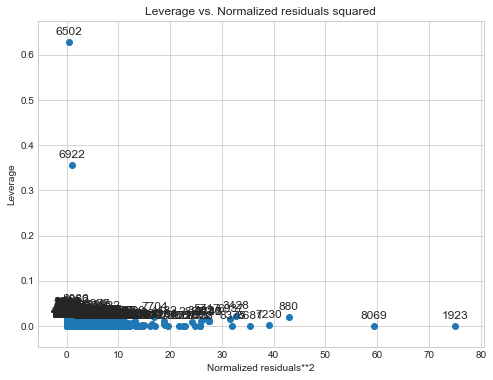

In [16]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(est, ax = ax)

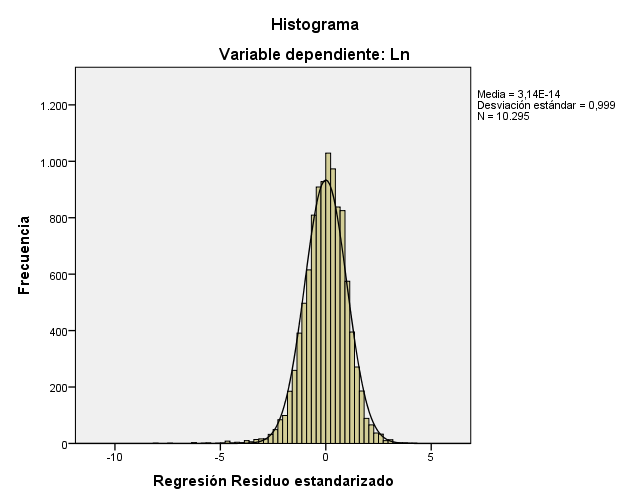

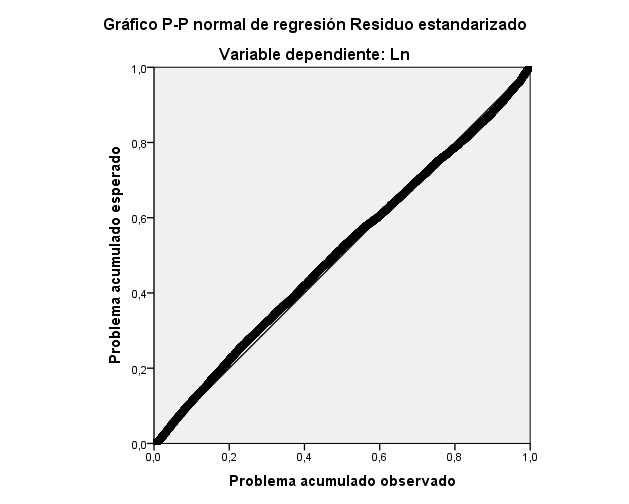

# Heterocedasticidad

Breush-Pagan test:

In [17]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(est.resid, est.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 977.25818073777464),
 ('p-value', 1.0072076259074715e-198),
 ('f-value', 71.977257531423092),
 ('f p-value', 2.6920919470859685e-209)]

La prueba Breush-Pagan crea una estadística que está distribuida en chi-cuadrado y para sus datos esa estadística = 7.18. El valor de p es el resultado de la prueba de ji cuadrado y (normalmente) la hipótesis nula se rechaza para el valor de p <0,05.

En este caso p<0,05 se rechaza la hipotesis nula de homocedasticidad